Code based on https://github.com/pytorch/examples/blob/master/mnist/main.py

In this exercise we are using high level abstractions from torch.nn like nn.Linear.
Note: during the next lab session we will go one level deeper and implement more things
with bare hands.

Tasks:

    1. Read the code.

    2. Check that the given implementation reaches 95% test accuracy for architecture input-128-128-10 after few epochs.

    3. Add the option to use SGD with momentum instead of ADAM.

    4. Experiment with different learning rates, plot the learning curves for different
    learning rates for both ADAM and SGD with momentum.

    5. Parameterize the constructor by a list of sizes of hidden layers of the MLP.
    Note that this requires creating a list of layers as an atribute of the Net class,
    and one can't use a standard python list containing nn.Modules (why?).
    Check torch.nn.ModuleList.


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [28]:
class Net(nn.Module):
    def __init__(self, sizes):
        super(Net, self).__init__()
        # After flattening an image of size 28x28 we have 784 inputs
        self.linears = nn.ModuleList([nn.Linear(a, b) for a, b in zip(sizes, sizes[1:])])

    def forward(self, x):
        x = torch.flatten(x, 1)
        for i, l in enumerate(self.linears[:-1]):
            x = l(x)
            x = F.relu(x)
        x = self.linears[-1](x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch, log_interval):
    losses = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return sum(losses) / len(losses)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return test_loss, float(correct) / len(test_loader.dataset)



In [ ]:
batch_size = 256
test_batch_size = 1000
epochs = 5
lr = 1e-2
use_cuda = False
seed = 1
log_interval = 10

In [ ]:
use_cuda = not use_cuda and torch.cuda.is_available()

torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Train Epoch: 5 [0/60000 (0%)]	Loss: 2.303051
Train Epoch: 5 [2560/60000 (4%)]	Loss: 2.287451
Train Epoch: 5 [5120/60000 (9%)]	Loss: 2.268348
Train Epoch: 5 [7680/60000 (13%)]	Loss: 2.256585
Train Epoch: 5 [10240/60000 (17%)]	Loss: 2.256988
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.254575
Train Epoch: 5 [15360/60000 (26%)]	Loss: 2.243042
Train Epoch: 5 [17920/60000 (30%)]	Loss: 2.239486
Train Epoch: 5 [20480/60000 (34%)]	Loss: 2.209198
Train Epoch: 5 [23040/60000 (38%)]	Loss: 2.203276
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.205193
Train Epoch: 5 [28160/60000 (47%)]	Loss: 2.188651
Train Epoch: 5 [30720/60000 (51%)]	Loss: 2.192160
Train Epoch: 5 [33280/60000 (55%)]	Loss: 2.189953
Train Epoch: 5 [35840/60000 (60%)]	Loss: 2.196856
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.148751
Train Epoch: 5 [40960/60000 (68%)]	Loss: 2.148979
Train Epoch: 5 [43520/60000 (72%)]	Loss: 2.135487
Train Epoch: 5 [46080/60000 (77%)]	Loss: 2.139362
Train Epoch: 5 [48640/60000 (81%)]	Loss: 2.101963
Train Epoc

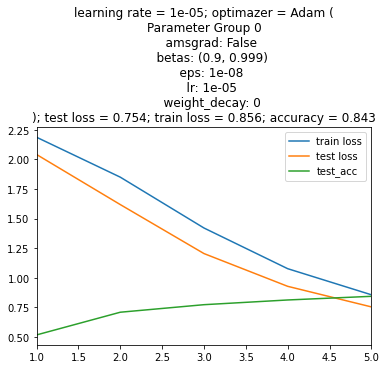

In [37]:
model = Net([784, 128, 128, 10]).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

train_losses = []
test_losses = []
test_accs = []

for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epochs, log_interval)
    test_loss, test_acc = test(model, device, test_loader)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

xs = range(1, len(train_losses) + 1)
plt.clf()
plt.xlim(1, epoch)
plt.plot(xs, train_losses, label='train loss')
plt.plot(xs, test_losses, label='test loss')
plt.plot(xs, test_accs, label='test_acc')
plt.title('\n'.join([f'learning rate = {lr}; optimazer = {optimizer}; test loss = {test_loss:.3f}; train loss = {train_loss:.3f}; accuracy = {test_acc:.3f}',]))
plt.legend()
plt.show()

3. Add the option to use SGD with momentum instead of ADAM.

In [ ]:
optimizer = input('Choose optimizer (adam or sgd): ')
if optimizer == 'sgd':
  momentum = float(input('Choose momentum: '))
else:
  momentum = 0

Choose optimizer (adam or sgd): sgd
Choose momentum: 0.9


In [ ]:
model = Net().to(device)

if optimizer == "adam":
    optimizer = optim.Adam(model.parameters(), lr=lr)
elif optimizer == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309133
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.203936
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.935541
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.427462
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.772554
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.727404
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.451121
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.363214
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.475467
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.365929
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.352351
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.489669
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.429617
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.404157
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.337452
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.361633
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.302381
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.258135
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.434615
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.203978
Train Epoc

4. Experiment with different learning rates, plot the learning curves for different
learning rates for both ADAM and SGD with momentum.

In [34]:
optimizer = input('Choose optimizer (adam or sgd): ')
if optimizer == 'sgd':
  momentum = float(input('Choose momentum: '))
else:
  momentum = 0

Choose optimizer (adam or sgd): adam


Train Epoch: 5 [0/60000 (0%)]	Loss: 2.316114
Train Epoch: 5 [2560/60000 (4%)]	Loss: 2.308079
Train Epoch: 5 [5120/60000 (9%)]	Loss: 2.307631
Train Epoch: 5 [7680/60000 (13%)]	Loss: 2.316910
Train Epoch: 5 [10240/60000 (17%)]	Loss: 2.310296
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.321749
Train Epoch: 5 [15360/60000 (26%)]	Loss: 2.310994
Train Epoch: 5 [17920/60000 (30%)]	Loss: 2.308727
Train Epoch: 5 [20480/60000 (34%)]	Loss: 2.316665
Train Epoch: 5 [23040/60000 (38%)]	Loss: 2.311928
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.317540
Train Epoch: 5 [28160/60000 (47%)]	Loss: 2.312048
Train Epoch: 5 [30720/60000 (51%)]	Loss: 2.308862
Train Epoch: 5 [33280/60000 (55%)]	Loss: 2.303005
Train Epoch: 5 [35840/60000 (60%)]	Loss: 2.318348
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.307833
Train Epoch: 5 [40960/60000 (68%)]	Loss: 2.301928
Train Epoch: 5 [43520/60000 (72%)]	Loss: 2.312908
Train Epoch: 5 [46080/60000 (77%)]	Loss: 2.316916
Train Epoch: 5 [48640/60000 (81%)]	Loss: 2.312479
Train Epoc

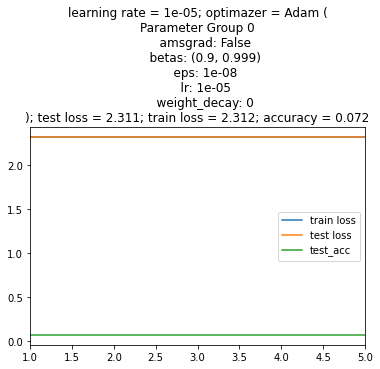

In [36]:
batch_size = 256
test_batch_size = 1000
epochs = 5
lr = 1e-5
use_cuda = False
seed = 1
log_interval = 10

model = Net([784, 128, 128, 10]).to(device)

if optimizer == "adam":
    optimizer = optim.Adam(model.parameters(), lr=lr)
elif optimizer == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


train_losses = []
test_losses = []
test_accs = []

for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epochs, log_interval)
    test_loss, test_acc = test(model, device, test_loader)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

xs = range(1, len(train_losses) + 1)
plt.clf()
plt.xlim(1, epoch)
plt.plot(xs, train_losses, label='train loss')
plt.plot(xs, test_losses, label='test loss')
plt.plot(xs, test_accs, label='test_acc')
plt.title('\n'.join([f'learning rate = {lr}; optimazer = {optimizer}; test loss = {test_loss:.3f}; train loss = {train_loss:.3f}; accuracy = {test_acc:.3f}',]))
plt.legend()
plt.show()

In [38]:
optimizer = input('Choose optimizer (adam or sgd): ')
if optimizer == 'sgd':
  momentum = float(input('Choose momentum: '))
else:
  momentum = 0

Choose optimizer (adam or sgd): sgd
Choose momentum: 0.3


Train Epoch: 5 [0/60000 (0%)]	Loss: 2.300355
Train Epoch: 5 [2560/60000 (4%)]	Loss: 2.298034
Train Epoch: 5 [5120/60000 (9%)]	Loss: 2.307871
Train Epoch: 5 [7680/60000 (13%)]	Loss: 2.306572
Train Epoch: 5 [10240/60000 (17%)]	Loss: 2.300175
Train Epoch: 5 [12800/60000 (21%)]	Loss: 2.307132
Train Epoch: 5 [15360/60000 (26%)]	Loss: 2.295490
Train Epoch: 5 [17920/60000 (30%)]	Loss: 2.303582
Train Epoch: 5 [20480/60000 (34%)]	Loss: 2.314482
Train Epoch: 5 [23040/60000 (38%)]	Loss: 2.309483
Train Epoch: 5 [25600/60000 (43%)]	Loss: 2.308862
Train Epoch: 5 [28160/60000 (47%)]	Loss: 2.307745
Train Epoch: 5 [30720/60000 (51%)]	Loss: 2.321765
Train Epoch: 5 [33280/60000 (55%)]	Loss: 2.293860
Train Epoch: 5 [35840/60000 (60%)]	Loss: 2.311819
Train Epoch: 5 [38400/60000 (64%)]	Loss: 2.301217
Train Epoch: 5 [40960/60000 (68%)]	Loss: 2.304377
Train Epoch: 5 [43520/60000 (72%)]	Loss: 2.307543
Train Epoch: 5 [46080/60000 (77%)]	Loss: 2.304230
Train Epoch: 5 [48640/60000 (81%)]	Loss: 2.312760
Train Epoc

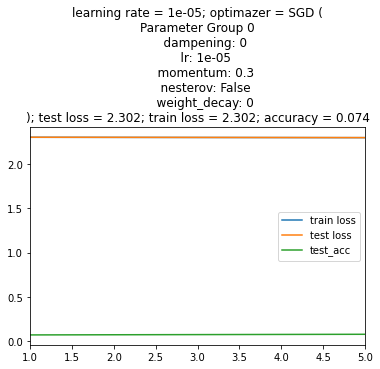

In [39]:
batch_size = 256
test_batch_size = 1000
epochs = 5
lr = 1e-5
use_cuda = False
seed = 1
log_interval = 10

model = Net([784, 128, 128, 10]).to(device)

if optimizer == "adam":
    optimizer = optim.Adam(model.parameters(), lr=lr)
elif optimizer == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


train_losses = []
test_losses = []
test_accs = []

for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epochs, log_interval)
    test_loss, test_acc = test(model, device, test_loader)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

xs = range(1, len(train_losses) + 1)
plt.clf()
plt.xlim(1, epoch)
plt.plot(xs, train_losses, label='train loss')
plt.plot(xs, test_losses, label='test loss')
plt.plot(xs, test_accs, label='test_acc')
plt.title('\n'.join([f'learning rate = {lr}; optimazer = {optimizer}; test loss = {test_loss:.3f}; train loss = {train_loss:.3f}; accuracy = {test_acc:.3f}',]))
plt.legend()
plt.show()